DATASET BAN ĐẦU -> UNSUPERVISED LEARNING

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture

df = pd.read_csv('../clean.csv') 

X = df.drop(columns=['booking_status'])
y = df['booking_status']

In [2]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,0,0,0,224,2017,10,2,3,0,0,0,65.00,0,1
1,2,0,2,3,3,0,0,5,2018,11,6,4,0,0,0,106.68,1,1
2,1,0,2,1,0,0,0,1,2018,2,28,4,0,0,0,60.00,0,0
3,2,0,0,2,0,0,0,211,2018,5,20,4,0,0,0,100.00,0,0
4,2,0,1,1,3,0,0,48,2018,4,11,4,0,0,0,94.50,0,0


In [3]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.515644,0.030986,0.708890,85.232557,2017.820427,7.423653,15.596995,3.552447,0.025637,0.023349,0.153411,103.423539,0.619655,0.672364
std,0.518715,0.402648,0.870644,1.410905,1.048131,0.173281,1.399851,85.930817,0.383836,3.069894,8.740447,0.681536,0.158053,0.368331,1.754171,35.089424,0.786236,0.469358
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,3.000000,0.000000,0.000000,0.000000,80.300000,0.000000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,4.000000,0.000000,0.000000,0.000000,99.450000,0.000000,1.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,0.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,4.000000,0.000000,0.000000,0.000000,120.000000,1.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,3.000000,1.000000,6.000000,443.000000,2018.000000,12.000000,31.000000,4.000000,1.000000,13.000000,58.000000,540.000000,5.000000,1.000000


XỬ LÝ OUTLIER


+ lead_time	

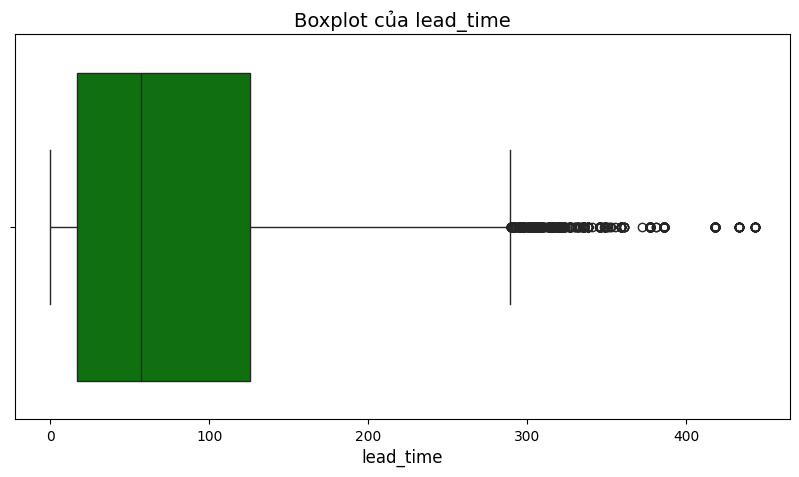

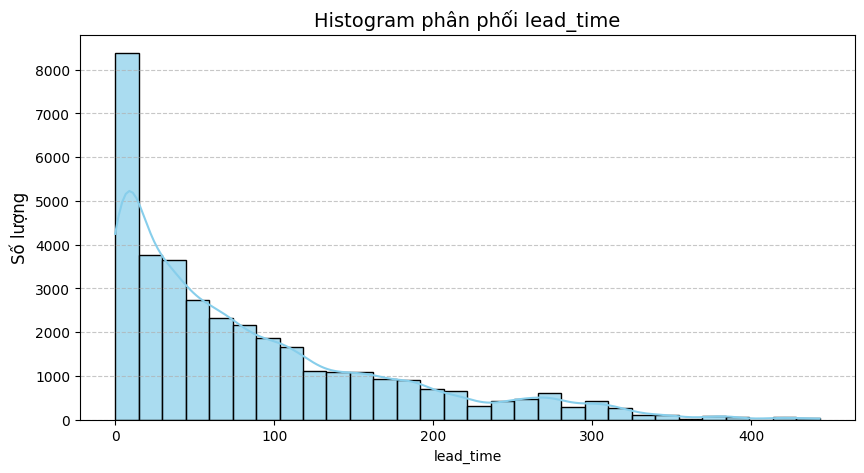

In [4]:
# Boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['lead_time'], color='green')
plt.title("Boxplot của lead_time", fontsize=14)
plt.xlabel("lead_time", fontsize=12)
plt.show()

# Histogram
plt.figure(figsize=(10, 5))
sns.histplot(df['lead_time'], bins=30, color='skyblue', kde=True, edgecolor='black', alpha=0.7)
plt.ylabel('Số lượng', fontsize=12)
plt.title('Histogram phân phối lead_time', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [5]:
Q1 = df['lead_time'].quantile(0.25)
Q3 = df['lead_time'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_before = df[(df['lead_time'] < lower_bound) | (df['lead_time'] > upper_bound)].shape[0]

df = df[(df['lead_time'] >= lower_bound) & (df['lead_time'] <= upper_bound)]

outliers_after = df[(df['lead_time'] < lower_bound) | (df['lead_time'] > upper_bound)].shape[0]

final_shape = df.shape

print(f"Outliers before removal: {outliers_before}")
print(f"Outliers after removal: {outliers_after}")
print(f"Final dfset shape: {final_shape}")

Outliers before removal: 1331
Outliers after removal: 0
Final dfset shape: (34944, 18)


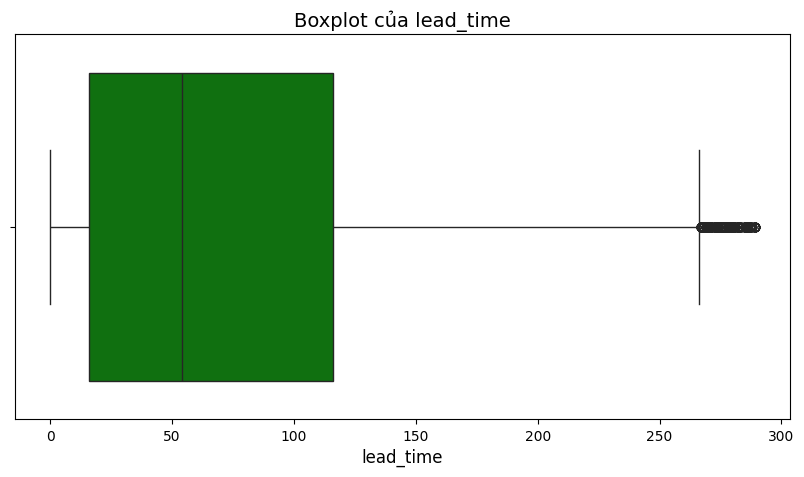

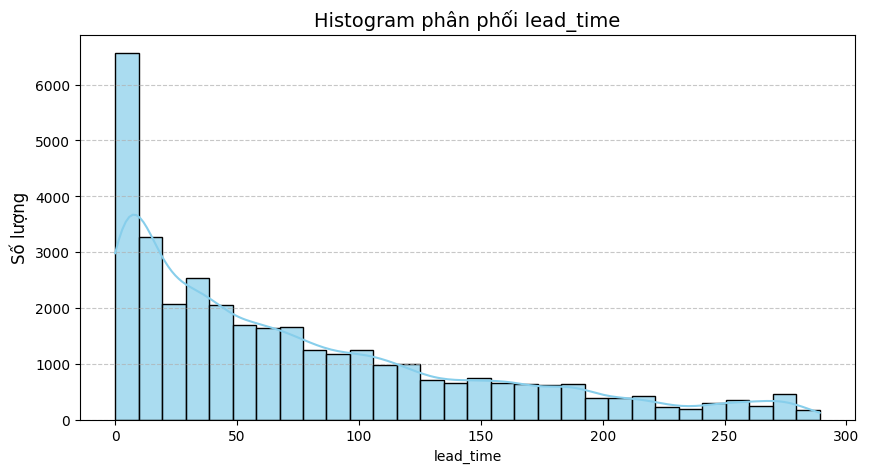

In [6]:
# Boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['lead_time'], color='green')
plt.title("Boxplot của lead_time", fontsize=14)
plt.xlabel("lead_time", fontsize=12)
plt.show()

# Histogram
plt.figure(figsize=(10, 5))
sns.histplot(df['lead_time'], bins=30, color='skyblue', kde=True, edgecolor='black', alpha=0.7)
plt.ylabel('Số lượng', fontsize=12)
plt.title('Histogram phân phối lead_time', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

+ avg_price_per_room

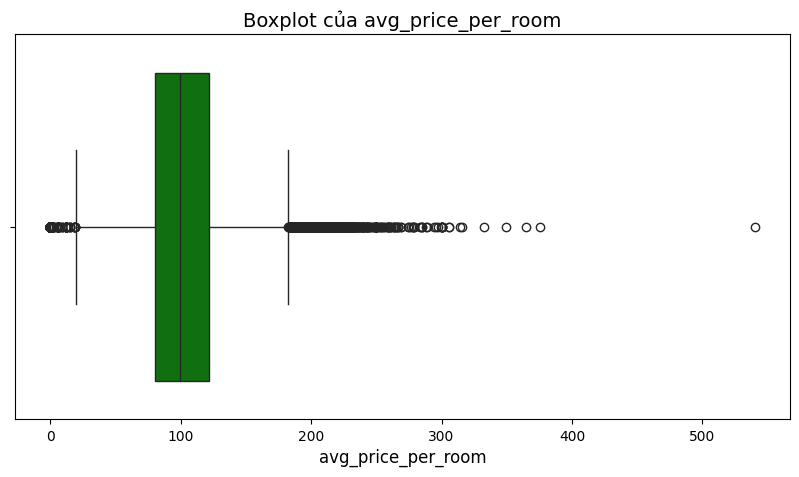

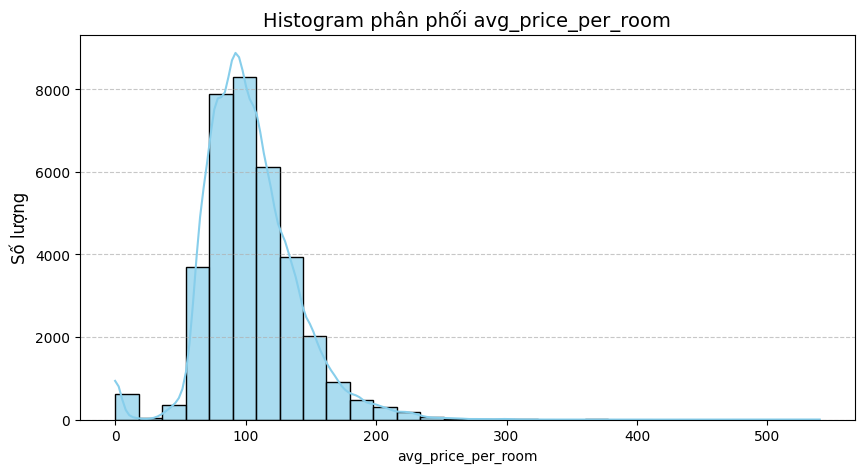

In [7]:
# Boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['avg_price_per_room'], color='green')
plt.title("Boxplot của avg_price_per_room", fontsize=14)
plt.xlabel("avg_price_per_room", fontsize=12)
plt.show()

# Histogram
plt.figure(figsize=(10, 5))
sns.histplot(df['avg_price_per_room'], bins=30, color='skyblue', kde=True, edgecolor='black', alpha=0.7)
plt.ylabel('Số lượng', fontsize=12)
plt.title('Histogram phân phối avg_price_per_room', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [8]:
Q1 = df['avg_price_per_room'].quantile(0.25)
Q3 = df['avg_price_per_room'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_before = df[(df['avg_price_per_room'] < lower_bound) | (df['avg_price_per_room'] > upper_bound)].shape[0]

df = df[(df['avg_price_per_room'] >= lower_bound) & (df['avg_price_per_room'] <= upper_bound)]

outliers_after = df[(df['avg_price_per_room'] < lower_bound) | (df['avg_price_per_room'] > upper_bound)].shape[0]

final_shape = df.shape

print(f"Outliers before removal: {outliers_before}")
print(f"Outliers after removal: {outliers_after}")
print(f"Final dfset shape: {final_shape}")

Outliers before removal: 1608
Outliers after removal: 0
Final dfset shape: (33336, 18)


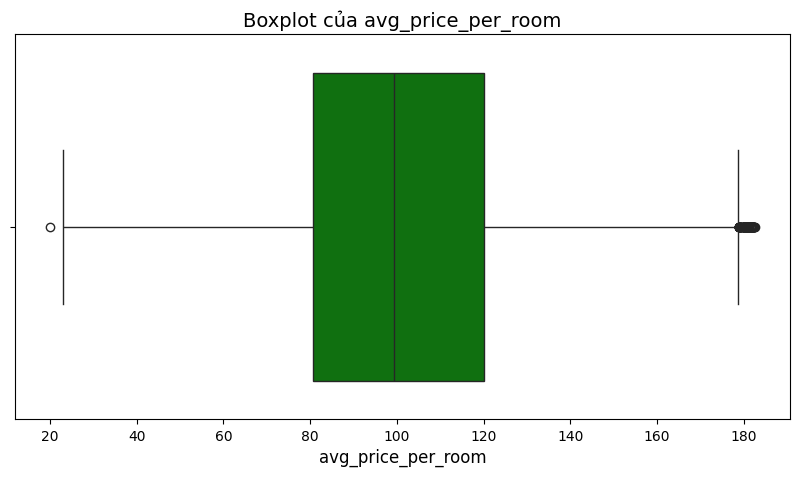

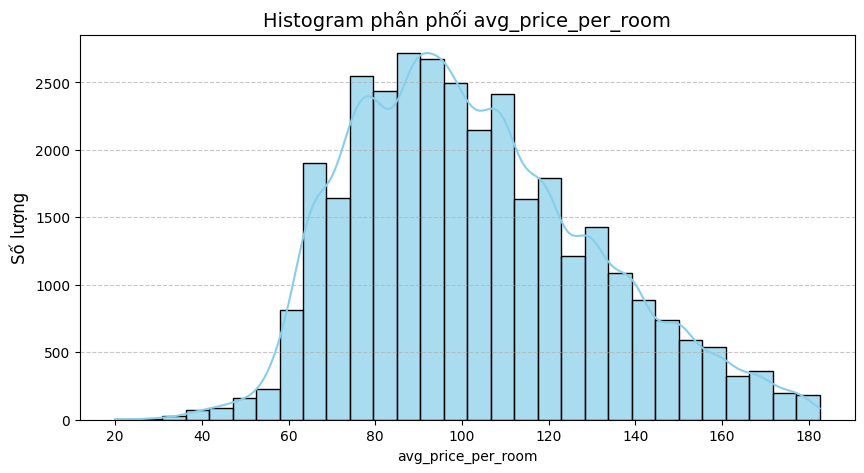

In [9]:
# Boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['avg_price_per_room'], color='green')
plt.title("Boxplot của avg_price_per_room", fontsize=14)
plt.xlabel("avg_price_per_room", fontsize=12)
plt.show()

# Histogram
plt.figure(figsize=(10, 5))
sns.histplot(df['avg_price_per_room'], bins=30, color='skyblue', kde=True, edgecolor='black', alpha=0.7)
plt.ylabel('Số lượng', fontsize=12)
plt.title('Histogram phân phối avg_price_per_room', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

+ no_of_special_requests

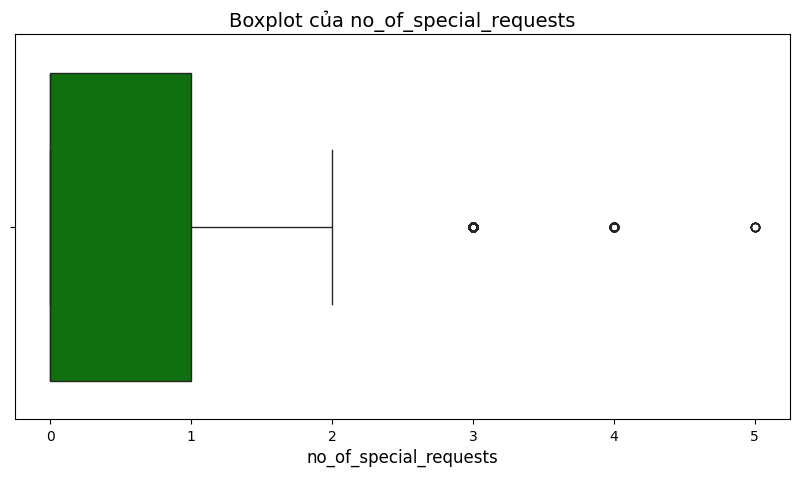

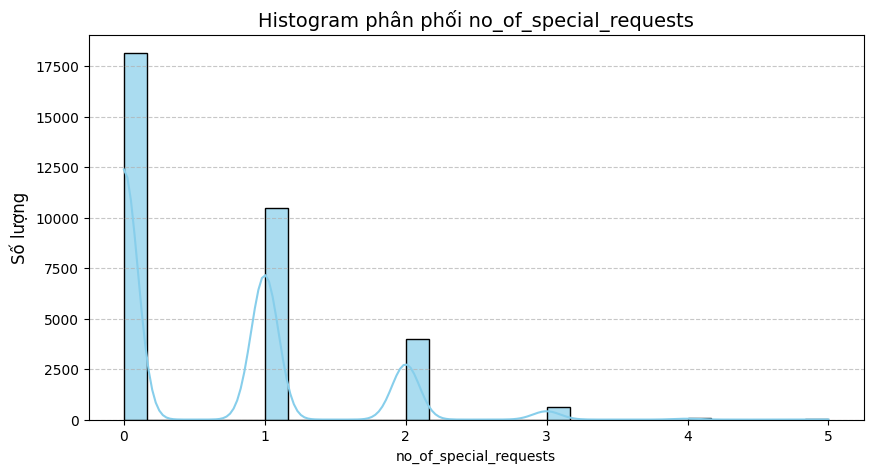

In [10]:
# Boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['no_of_special_requests'], color='green')
plt.title("Boxplot của no_of_special_requests", fontsize=14)
plt.xlabel("no_of_special_requests", fontsize=12)
plt.show()

# Histogram
plt.figure(figsize=(10, 5))
sns.histplot(df['no_of_special_requests'], bins=30, color='skyblue', kde=True, edgecolor='black', alpha=0.7)
plt.ylabel('Số lượng', fontsize=12)
plt.title('Histogram phân phối no_of_special_requests', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [11]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
count,33336.000000,33336.000000,33336.000000,33336.000000,33336.000000,33336.000000,33336.000000,33336.000000,33336.000000,33336.000000,33336.000000,33336.000000,33336.000000,33336.000000,33336.000000,33336.000000,33336.000000,33336.000000
mean,1.843113,0.080694,0.827874,2.218203,0.530208,0.030388,0.635499,77.774748,2017.815995,7.336963,15.550996,3.579344,0.023728,0.022708,0.137719,102.557279,0.618401,0.687395
std,0.516983,0.341031,0.874901,1.420064,1.077548,0.171654,1.281357,72.812124,0.387494,3.096478,8.760057,0.642015,0.152203,0.375163,1.699334,27.724457,0.782451,0.463562
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,3.000000,0.000000,0.000000,0.000000,80.750000,0.000000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,56.000000,2018.000000,8.000000,16.000000,4.000000,0.000000,0.000000,0.000000,99.450000,0.000000,1.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,0.000000,0.000000,118.000000,2018.000000,10.000000,23.000000,4.000000,0.000000,0.000000,0.000000,120.000000,1.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,3.000000,1.000000,6.000000,289.000000,2018.000000,12.000000,31.000000,4.000000,1.000000,13.000000,58.000000,182.530000,5.000000,1.000000


Sử dụng heatmap để xem sự tương quan của các feature

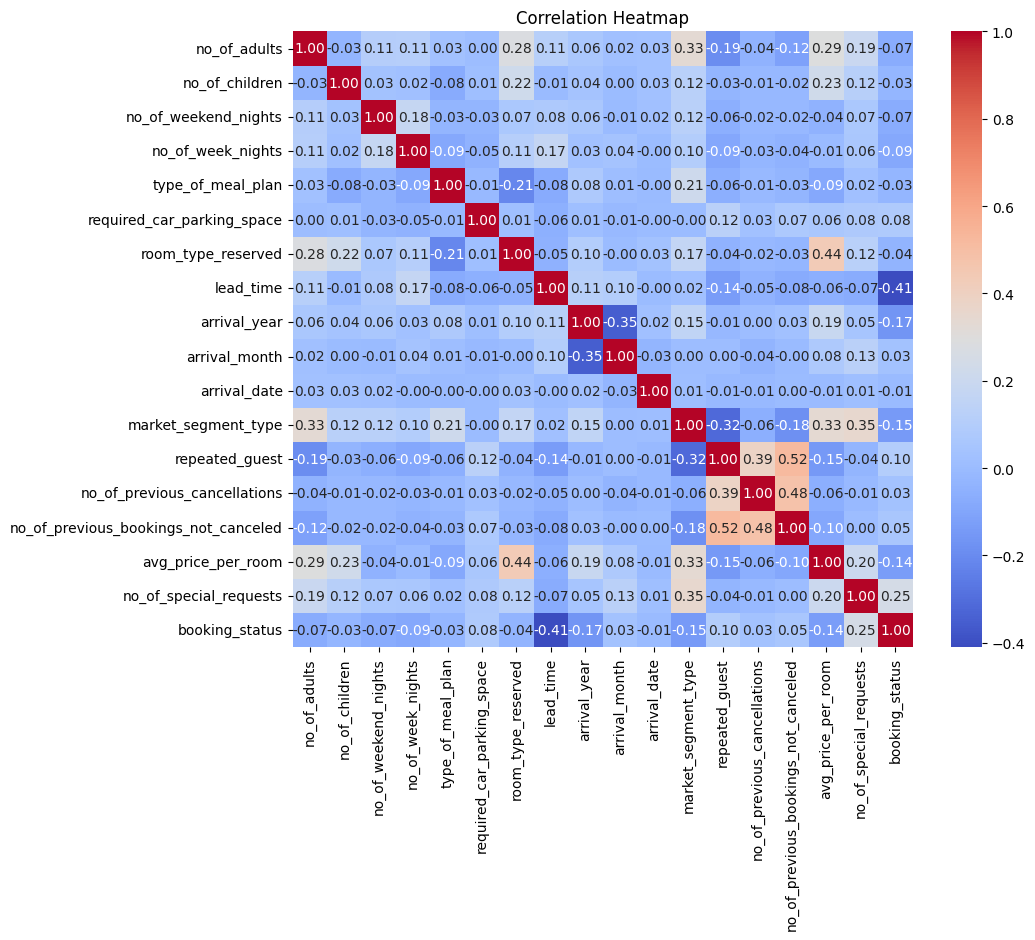

In [12]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

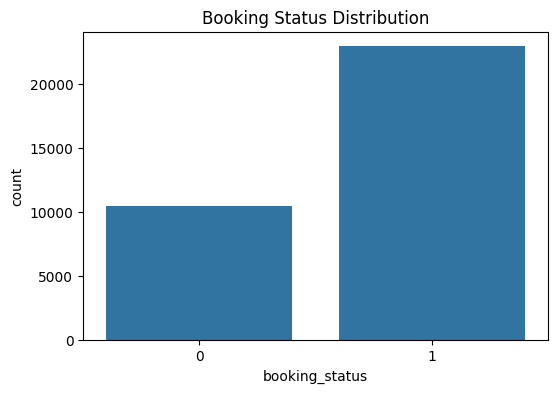

In [13]:
# Kiểm tra phân bố booking_status
plt.figure(figsize=(6, 4))
sns.countplot(x='booking_status', data=df)
plt.title('Booking Status Distribution')
plt.show()

In [14]:
X = df.drop(columns=['booking_status'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

# Thêm vào DataFrame
df['dbscan_cluster'] = dbscan_labels
df['dbscan_outlier'] = (dbscan_labels == -1).astype(int)

In [15]:
gmm = GaussianMixture(n_components=3, random_state=42)
gmm.fit(X_scaled)
gmm_probs = gmm.predict_proba(X_scaled)

# Thêm xác suất vào DataFrame
for i in range(gmm_probs.shape[1]):
    df[f'gmm_prob_{i}'] = gmm_probs[:, i]

In [16]:
df.to_csv('../DatasetUL.csv', index=False)

In [17]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,...,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,dbscan_cluster,dbscan_outlier,gmm_prob_0,gmm_prob_1,gmm_prob_2
0,2,0,1,2,0,0,0,224,2017,10,...,0,0,65.00,0,1,0,0,3.040454e-14,1.0,0.0
1,2,0,2,3,3,0,0,5,2018,11,...,0,0,106.68,1,1,-1,1,2.803105e-16,1.0,0.0
2,1,0,2,1,0,0,0,1,2018,2,...,0,0,60.00,0,0,1,0,4.622906e-11,1.0,0.0
3,2,0,0,2,0,0,0,211,2018,5,...,0,0,100.00,0,0,2,0,1.015229e-11,1.0,0.0
4,2,0,1,1,3,0,0,48,2018,4,...,0,0,94.50,0,0,-1,1,5.874644e-16,1.0,0.0


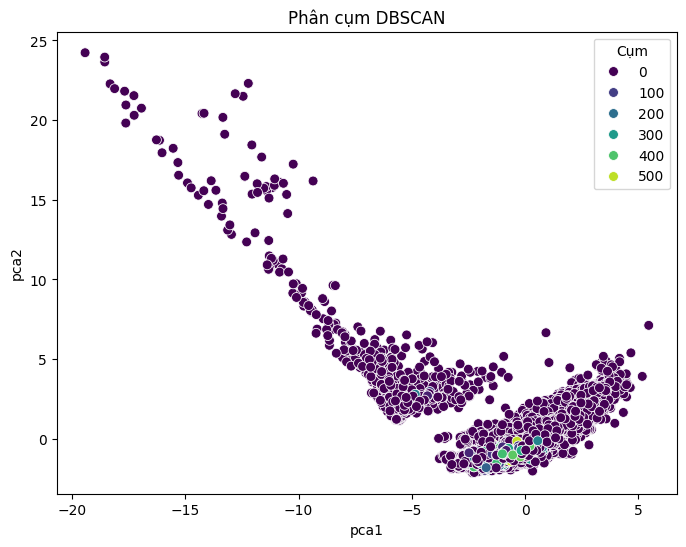

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df['pca1'] = X_pca[:, 0]
df['pca2'] = X_pca[:, 1]

# Vẽ phân cụm DBSCAN
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='pca1', y='pca2', hue='dbscan_cluster', palette='viridis', s=50)
plt.title('Phân cụm DBSCAN')
plt.legend(title='Cụm')
plt.show()

 Trực quan xác suất GMM (soft clustering)

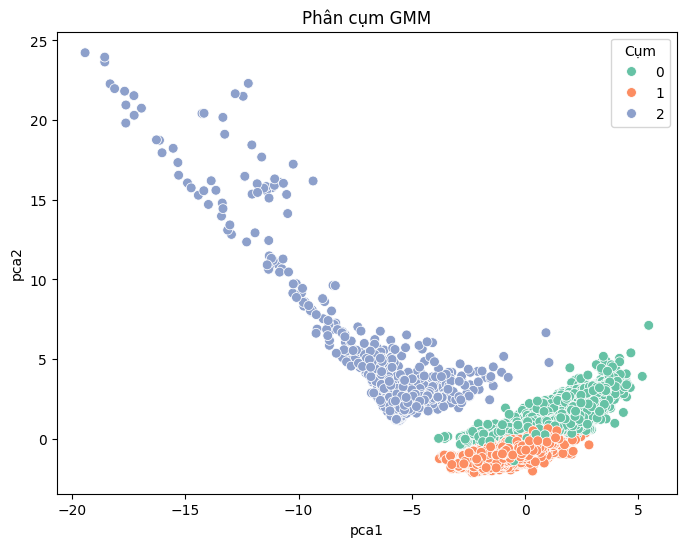

In [19]:
df['gmm_cluster'] = gmm.predict(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='pca1', y='pca2', hue='gmm_cluster', palette='Set2', s=50)
plt.title('Phân cụm GMM')
plt.legend(title='Cụm')
plt.show()